In [1]:
from requests import get
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk

In [2]:
import prepare as prep

In [131]:

import matplotlib as mpl

plt.rc('figure', figsize=(13, 10))
plt.rc('font', size=16)
plt.style.use('seaborn-darkgrid')

# Acquire

we are using the function in acquire.py to get a repo.

**Note : the repo name should not contain spaces**

I was working with a small size data to create prepare and explore

In [ ]:
# repo_json_file = 'data2.json'
# df_github = pd.read_json(repo_json_file)

In [ ]:
# df_github

In [ ]:
#  df_github.to_csv('df.csv')

In [ ]:
#df = pd.read_csv('df.csv', index_col=0)

In [ ]:
# df

# acquire big data

In [ ]:
#read from csv (data prevously acquired)
df = pd.read_csv('git_data.csv', index_col=0)

In [ ]:
df.shape

# Prepare

in this section we are going to clean data:
- remove non english readmes
- check missing values. remove rows
- remove duplicated rows
- in exploration I realize that jupyter notebook was under language and it should be pyton
- get only the top n programming languages
- use my function that clean, steem

### remove non english

In [ ]:
#we have to remove the observation that the text are not in english. we did it this way because textblob stopped working
# in order to continue we select the index and remove the entire row.

In [ ]:
index_nonenglish = [16,19,37,43,76,90,108,115,124,131,135,138,143,151,152,156,166,171,174,185,193,197,199,
       205,208,211, 216,217,221,224,229,230,239,241,248,273,277,278,279,292,298,310,311,316,317,
       324,328,329,330,336,341,352,357,365,366,372,374,379,385,390,399]
df = df.drop(df.index[[index_nonenglish]])


In [ ]:
df.shape

# *****************

**NoTe:** we install textblob , it was working and then stop working

#### detect language

install :
```
$ pip install -U textblob
$ python -m textblob.download_corpora
```
https://textblob.readthedocs.io/en/dev/install.html

In [ ]:
from textblob import TextBlob

In [ ]:
df.readme_contents[0]

In [ ]:
text = 'house is blue'
lang = TextBlob(text)
print(lang.detect_language())

In [ ]:
# lang.detect_language()

In [ ]:
df.head()

In [ ]:
# for n in range (0, len(df)):
#     text = df.readme_contents[n]
#     lang = TextBlob(text)
#     print(lang.detect_language())
#     if lang.detect_language() != 'en':
#         df =df.drop([n])
    

In [ ]:
#create a function
def remove_nonenglish (df):
    '''
    takes in df and 1 column to check if the text is in englis if not that row is going to be remove
    '''
    for n in range (0, len(df)):
        text = df.clean[n]
        lang = TextBlob(text)
        if lang.detect_language() != 'en':
            df =df.drop([n])
    return df

# *****************

### missing values

In [ ]:
#check missing values using my function
miss_val =prep.miss_dup_values(df)
miss_val

**Note:  we can see we have missing values in language , so I'm going to remove the rows that have missing values in language**

In [ ]:
#removing missing values
df = df.dropna(axis=0).reset_index(drop=True)

In [ ]:
df.shape

### change jupyter notebook to python

In [ ]:
df['language'].replace('Jupyter Notebook', 'Python', inplace=True )

### get the top n programming languages

In [ ]:
df.head()

In [15]:
def top_n_target(df,target,  n):
    '''
    takes in a df and target and give you the top n of you target
    return a df with only the top n 
    '''
    
    #get the value counts of the target
    targ =pd.DataFrame(df[[target]].value_counts())\
    .reset_index().rename(columns= {0:'cnt', 'index':target})
    #get the top 5
    topl= list(targ.loc[0:(n-1)].language.values)
    #get new df with only the top n values of target
    df= df[df.language.isin(topl)].reset_index(drop=True)
    return  df

In [ ]:
df = top_n_target(df, 'language', 5)

In [ ]:
df.language.value_counts()

### clean, tokenized, stemming, lemmatize

In [ ]:
#use my prepare function
df =prep.prepare_data(df, 'readme_contents')

In [ ]:
df.head()

___________

In [ ]:
def basic_clean (string):
    '''
    takes in a string and lowercase everything, normalize unicode characters, replace anything that is not a letter,
    number, whitespace or a single quote.
    retunr a clean string
    '''
    
    string = string.lower()
    string = unicodedata.normalize('NFKC',string)\
    .encode('ascii', 'ignore')\
    .decode('utf-8')
    string = re.sub(r"[^a-z0-9\s]", '', string)
    string = re.sub(r'\w*http\w*', '', string)
    string = re.sub(r'\w*github\w*', '', string)
    string = re.sub(r'\w*html\w*', '', string)
    string = re.sub(r'\w*gmail\w*', '', string)
    string = re.sub(r'\w*\n\w*', '', string)



    return string

In [ ]:
#df.readme_contents[0]

In [ ]:
import unicodedata
import re
#basic_clean (df.readme_contents[0])

## MAIN FUNCTION FOR PREPARE

In [14]:
def prepare_mf (df,extra_words=[], exclude_words=[] ):
    '''
    takes in a df and all the rows with missing information, non English text,
    and then clean, tokenize, stemming, lemmatize
    '''
    
    # remove non english
    index_nonenglish = [16,19,37,43,76,90,108,115,124,131,135,138,143,151,152,156,166,171,174,185,193,197,199,
       205,208,211, 216,217,221,224,229,230,239,241,248,273,277,278,279,292,298,310,311,316,317,
       324,328,329,330,336,341,352,357,365,366,372,374,379,385,390,399]

    df = df.drop(df.index[[index_nonenglish]])
    
    
    #remove duplicates 
    df =df.drop_duplicates()
    
    #removing missing values
    df = df.dropna(axis=0).reset_index(drop=True)
    
    
    #removing texts that are not English
    #df = remove_nonenglish(df)

    #replace Jupyter notebook by python
    df['language'].replace('Jupyter Notebook', 'Python', inplace=True )
    
        
        
    #get the top n languages
    df = top_n_target(df, 'language', 5).reset_index(drop=True)
    
    #use my prepare function to  clean, tokenized, stemming, lemmatize
    df =prep.prepare_data(df, 'readme_contents', extra_words= extra_words, exclude_words=exclude_words)



    return df
    
    
    

In [ ]:
# check the prepare_mf function from prepare.py

In [110]:
#read from csv (data prevously acquired)
df = pd.read_csv('git_data.csv', index_col=0)

In [111]:
df.shape

(400, 3)

In [112]:
#words to include as a stopwords
extra_words =  ['javascript', 'python', 'java', 'c', 'typescript', 'file', 
                'test', 'install', 'img', 'library','code']

In [113]:
#prepare data
df = prep.prepare_mf(df, extra_words )

In [114]:
df.shape

(180, 6)

In [115]:
df.head()

repo    language  \
0                    tensorflow/tensorflow         C++   
1                           twbs/bootstrap  JavaScript   
2  Pierian-Data/Complete-Python-3-Bootcamp      Python   
3            nightscout/cgm-remote-monitor  JavaScript   
4                            opencv/opencv         C++   

                                     readme_contents  \
0  <div align="center">\n  <img src="https://www....   
1  <p align="center">\n  <a href="https://getboot...   
2  # Complete-Python-3-Bootcamp\nCourse Files for...   
3  Nightscout Web Monitor (a.k.a. cgm-remote-moni...   
4  ## OpenCV: Open Source Computer Vision Library...   

                                               clean  \
0  div endtoend open source machine learning comp...   
1  p altbootstrap logo width200 sleek intuitive p...   
2   files complete 3 bootcamp course pierian data 95   
3  nightscout web monitor aka herokuherokuimghero...   
4  opencv open source computer vision homepage co...   

                                             stemmed  \
0  div endtoend open sourc machin learn comprehen...   
1  p altbootstrap logo width200 sleek intuit powe...   
2      file complet 3 bootcamp cours pierian data 95   
3  nightscout web monitor aka herokuherokuimghero...   
4  opencv open sourc comput vision homepag cours ...   

                                          lemmatized  
0  div endtoend open source machine learning comp...  
1  p altbootstrap logo width200 sleek intuitive p...  
2    file complete 3 bootcamp course pierian data 95  
3  nightscout web monitor aka herokuherokuimghero...  
4  opencv open source computer vision homepage co...

In [116]:
#split train, validate and test
train, validate, test = prep.split_data(df, 'language')

complete df -> (180, 6)
train -> (100, 6)
validate -> (44, 6)
test -> (36, 6)


_____________

# Explore

Explore the data that you have scraped. Here are some ideas for exploration:

- What are the most common words in READMEs?
- What does the distribution of IDFs look like for the most common words?
- Does the length of the README vary by programming language?
- Do different programming languages use a different number of unique words?


### - What are the most common words in READMEs?

In [117]:
train.language.value_counts()

JavaScript    34
Python        26
Java          19
C++           12
TypeScript     9
Name: language, dtype: int64

In [118]:
#get the list of languages
list_lang = list(train.language.value_counts().index)

In [119]:
#joint all the text of each language
join_text ={}
for language in list_lang :
    join_text[language] = prep.basic_clean(' '.join(train[train.language == language].lemmatized))

#add allwords
join_text['all_words']= prep.basic_clean(' '.join(train.lemmatized))



In [120]:
#check if we have all the languages
join_text.keys()

dict_keys(['JavaScript', 'Python', 'Java', 'C++', 'TypeScript', 'all_words'])

**Represent text as word frequencies.**

In [165]:
#create a word_count df 
word_counts= pd.DataFrame()
for lang in join_text:
    word_counts[lang] = pd.Series(join_text[lang].split()).value_counts()
word_counts= word_counts.fillna(0).astype(int)

In [220]:
word_counts.sort_values('all_words', ascending=False).head()

JavaScript  Python  Java  C++  TypeScript  all_words
learning           6     367     1   10           1        385
td               211       0   174    0           0        385
data              38     319     8    4          10        379
machine            9     348     0    6           0        363
eta              344       1     0    0           0        345

In [167]:
word_counts.shape

(7426, 6)

###  Most common words in READMEs

In [168]:
#vizualizacion all the words for any text
def word_cloud (text):

    plt.figure(figsize=(10,10))
    img = WordCloud(background_color='white', width=800, height=600).generate(text)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [169]:
def wordcloud_top(df,column, n_top=50):
    '''
    takes in a df , column and a number of top words to show
    '''
    top_all =df.sort_values(column, ascending=False)[[column]].head(n_top)
    word_cloud(' '.join(top_all.index))
    

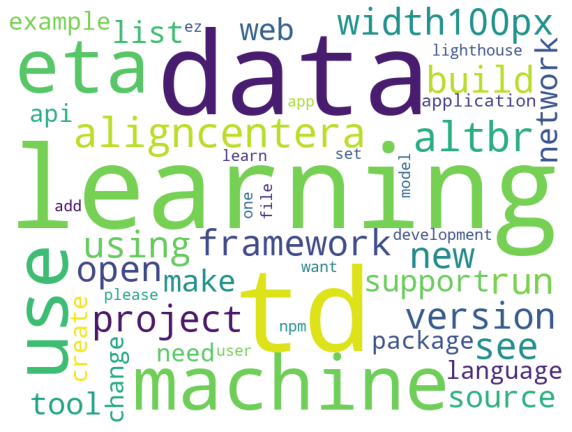

In [170]:
wordcloud_top(word_counts, 'all_words' , 50)

#### most common words in README by type of language

<Figure size 1440x1080 with 0 Axes>

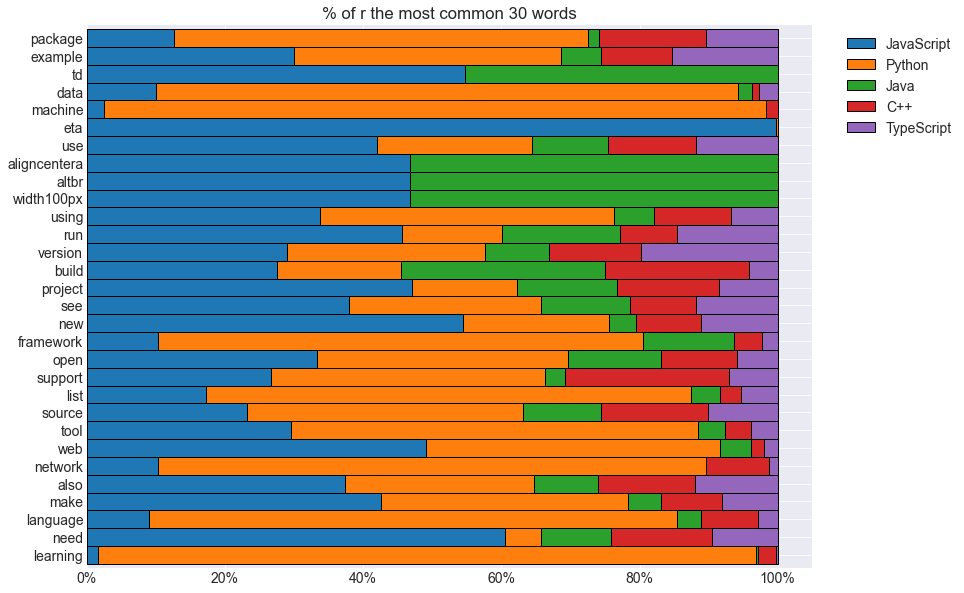

In [171]:
plt.figure(figsize=(20, 15))
plt.rc('font', size=14)
# axis=1 in .apply means row by row
(word_counts.sort_values(by='all_words', ascending=False)
 .head(30)
 .apply(lambda row: row / row['all_words'], axis=1)
 .sort_values(by='all_words')
 .drop(columns='all_words')
 .plot.barh(stacked=True, width=1, ec='black'))
plt.title('% of r the most common 30 words')
plt.legend(bbox_to_anchor= (1.03,1))

plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter('{:.0%}'.format))
plt.show()

### most common words sorted by each language

<Figure size 720x576 with 0 Axes>

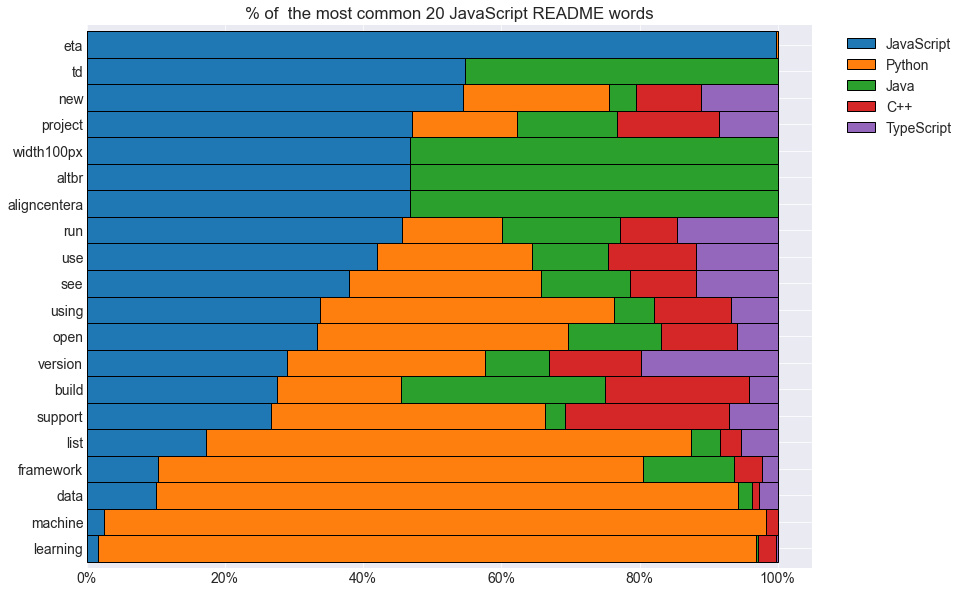

<Figure size 720x576 with 0 Axes>

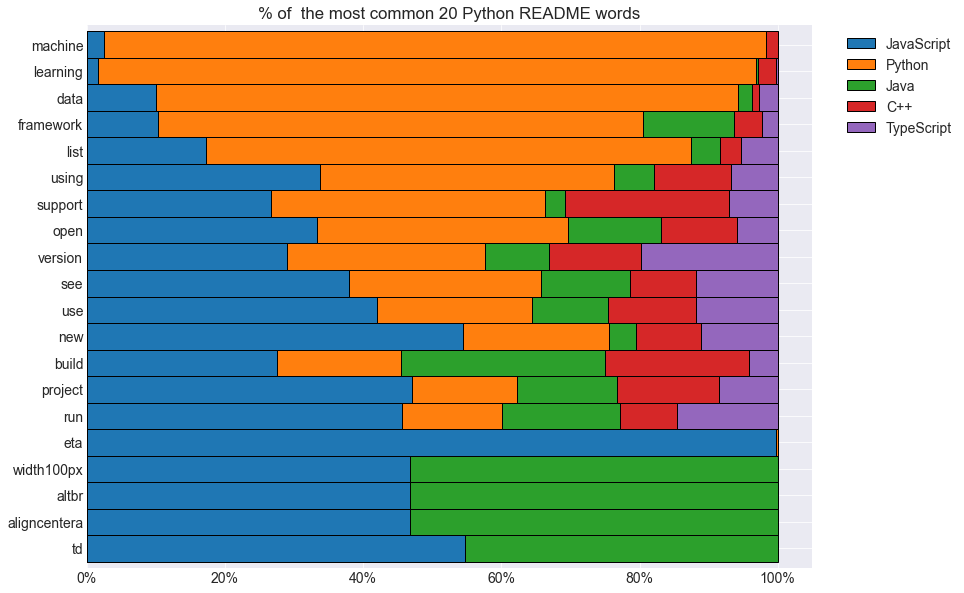

<Figure size 720x576 with 0 Axes>

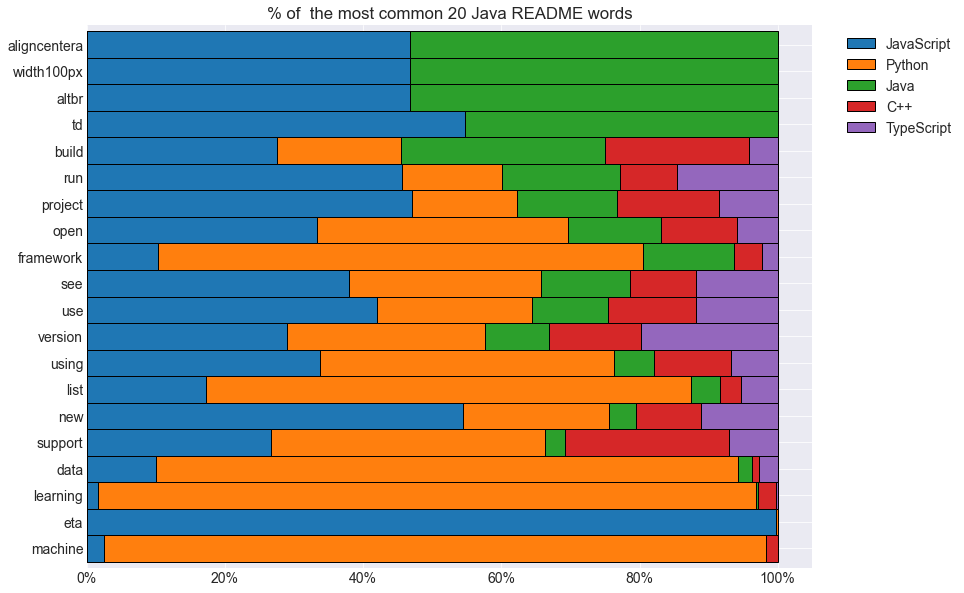

<Figure size 720x576 with 0 Axes>

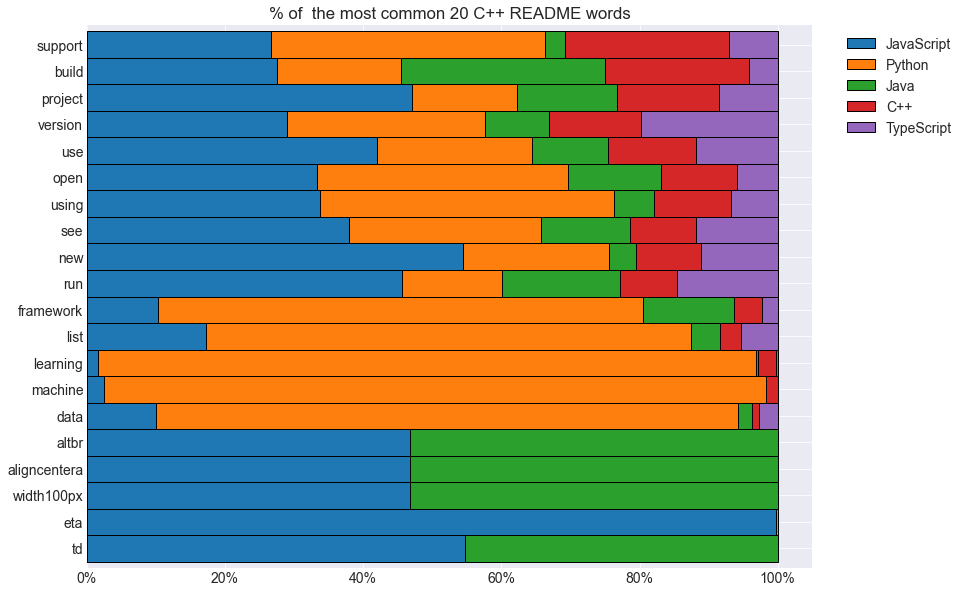

<Figure size 720x576 with 0 Axes>

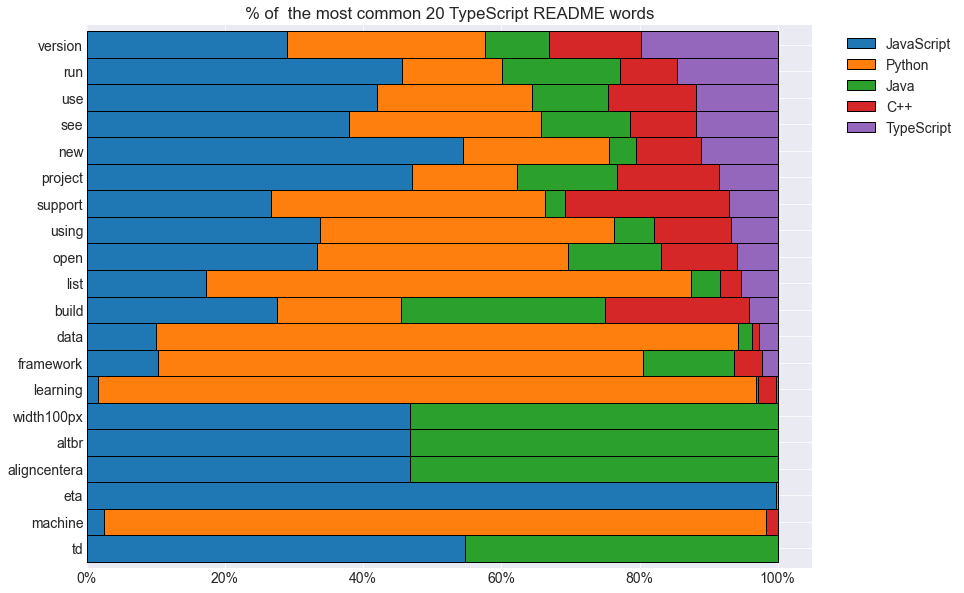

In [221]:
for column in word_counts.drop(columns='all_words'):
    plt.figure(figsize=(10, 8))
    plt.rc('font', size=14)
    # axis=1 in .apply means row by row
    (word_counts.sort_values(by='all_words', ascending=False)
     .head(20)
     .apply(lambda row: row / row['all_words'], axis=1)
     .drop(columns='all_words')
     .sort_values(by= column)
     .plot.barh(stacked=True, width=1, ec='black'))
    plt.title(f'% of  the most common 20 {column} README words')
    plt.legend(bbox_to_anchor= (1.03,1))

    plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter('{:.0%}'.format))
    plt.show()

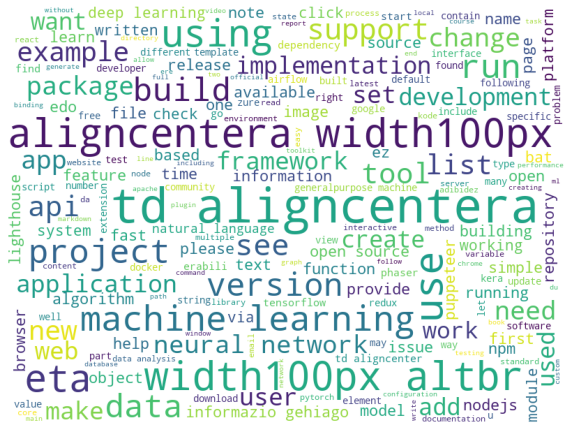

In [173]:
#this is a wordcloudd including all words
word_cloud(join_text['all_words'])

### Top 50 words 

 ********************* Language : JavaScript *********************


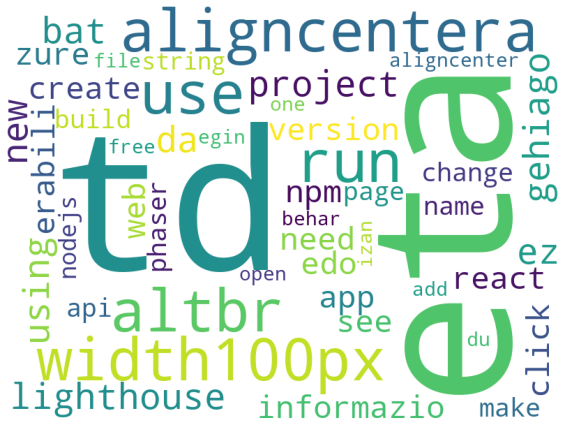

 
 ********************* Language : Python *********************


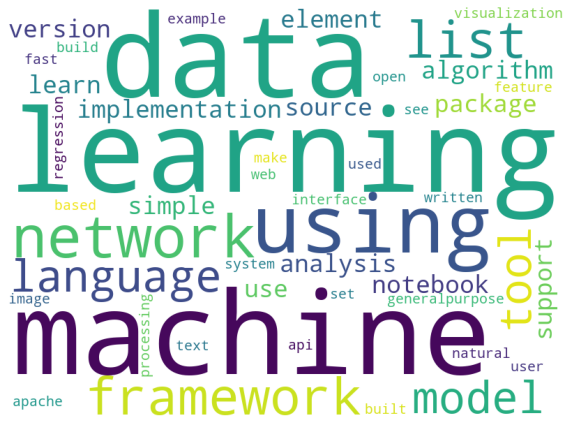

 
 ********************* Language : Java *********************


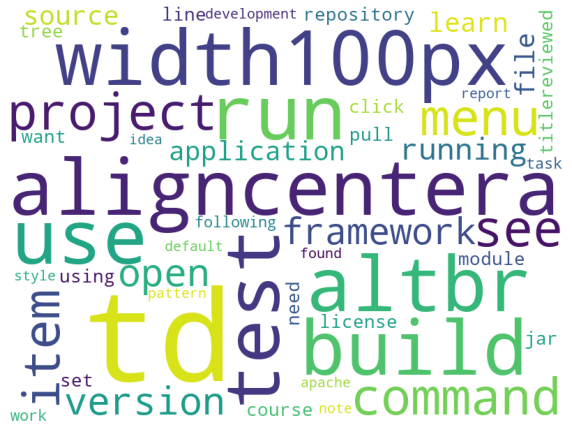

 
 ********************* Language : C++ *********************


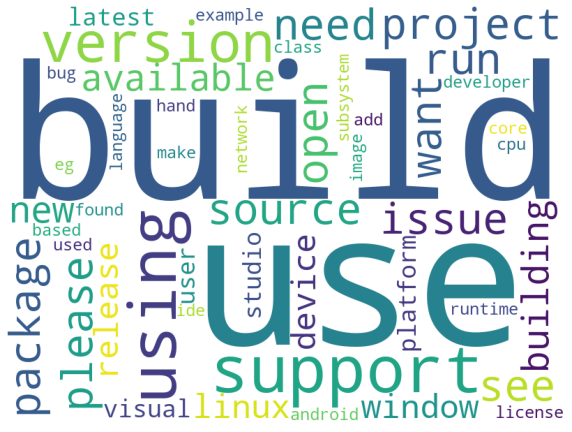

 
 ********************* Language : TypeScript *********************


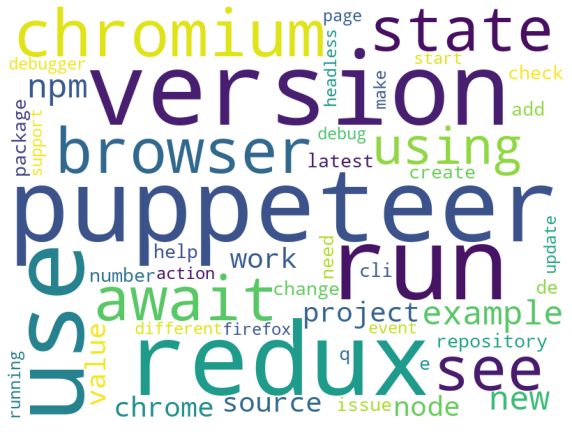

 
 ********************* Language : all_words *********************


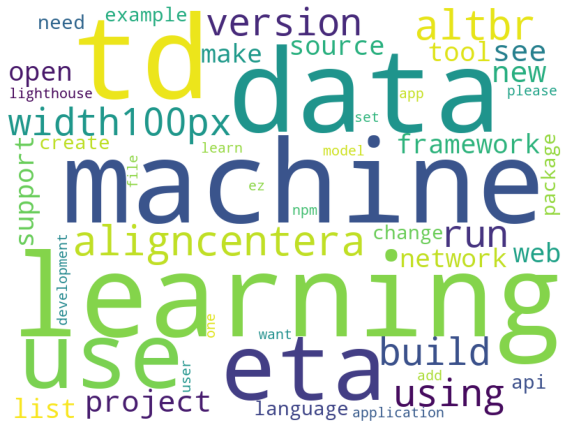

In [174]:

for col in word_counts.columns:
    print (f' ********************* Language : {col} *********************')
    wordcloud_top(word_counts, col ,50)
    print(' ')

### bigrams

In [216]:
def ngrams_wordcloud (language, n=2, top = 20):
    #plot barh
    plt.figure(figsize=(20,20))
    
    plt.subplot(2,2,1)
    pd.Series(nltk.ngrams(join_text[language].split(), n=n)).value_counts().head(top).sort_values(ascending = True).plot.barh()
    plt.title(f'Top {top} most common {language} ngrams where n={n}')
    
    #word_cloud
    ng =(pd.Series(nltk.ngrams(join_text[language].split(), n=n)).value_counts().head(top)).to_dict()
    ng_words = {k[0] + ' ' + k[1]: v for k, v in ng.items()}
    plt.subplot(2,2,2)
    img = WordCloud(background_color='white', width=800, height=600).generate_from_frequencies(ng_words)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Top {top} most common {language} ngrams where n={n}')
    #plt.tight_layout()
    plt.show()

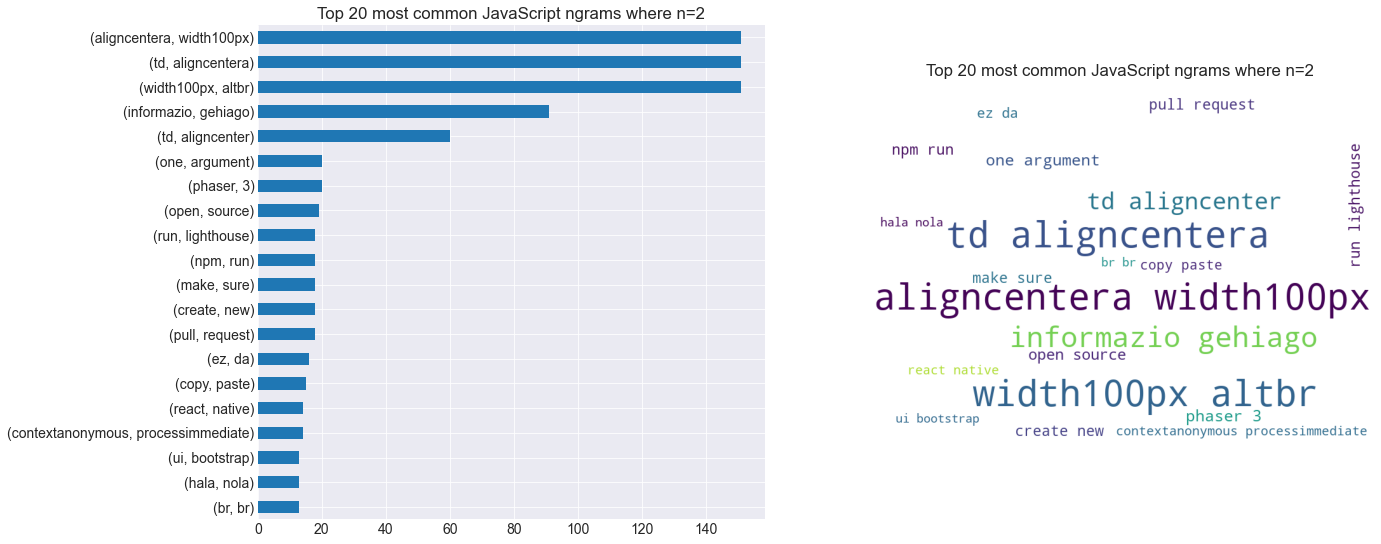

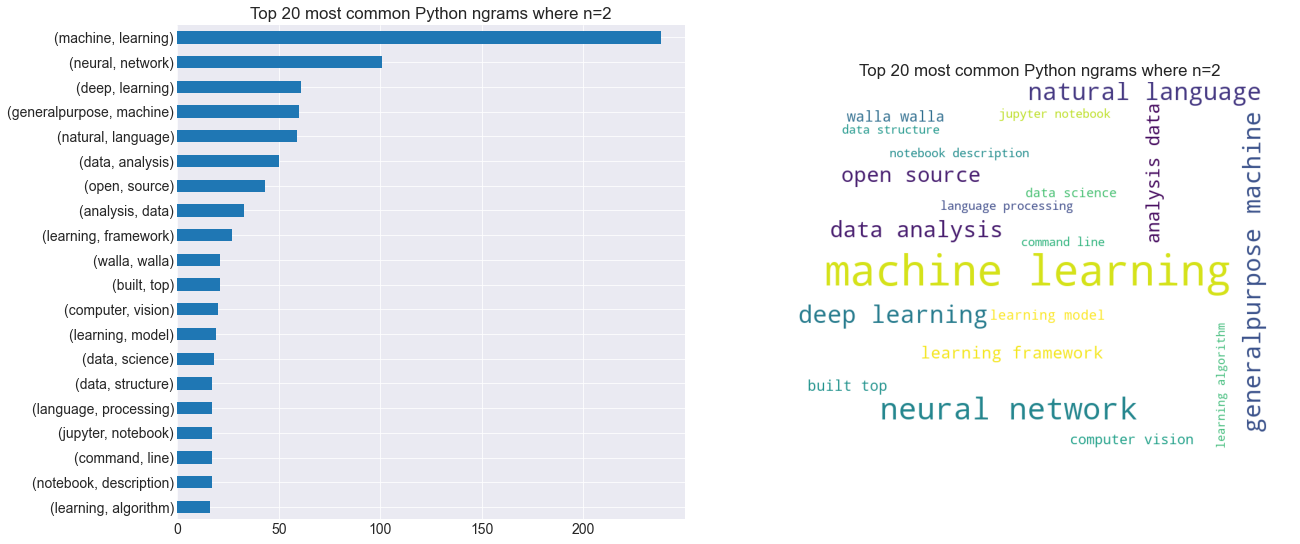

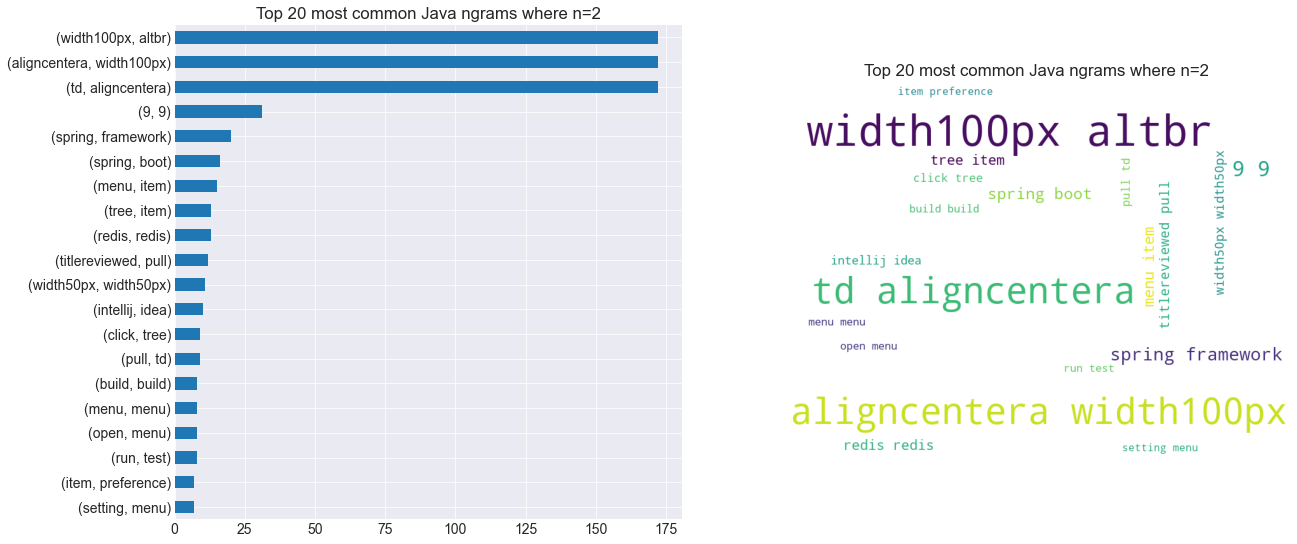

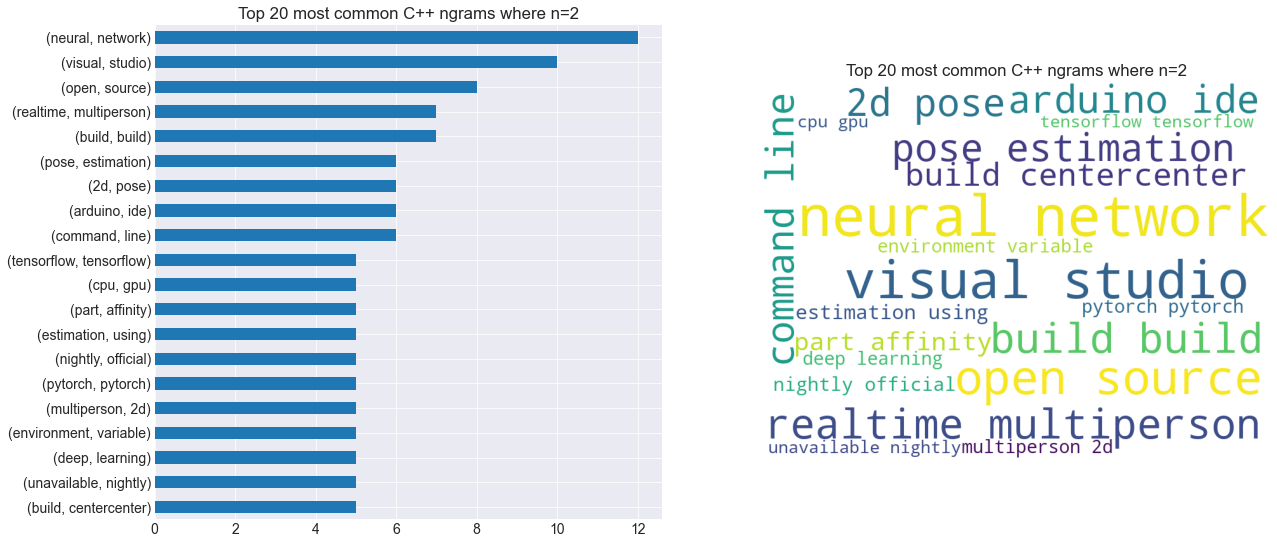

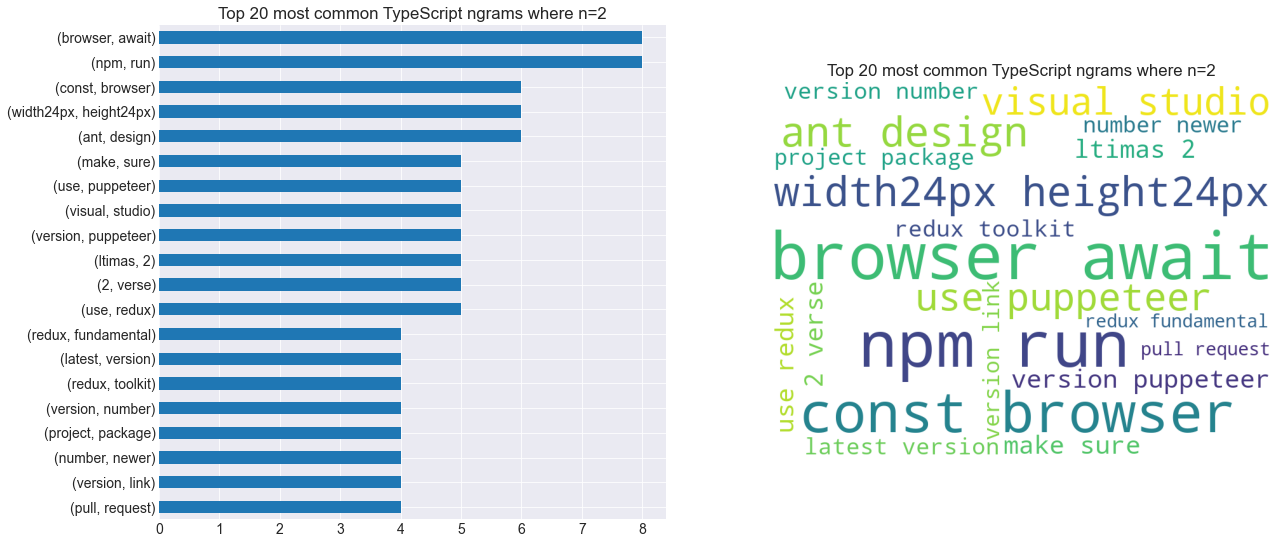

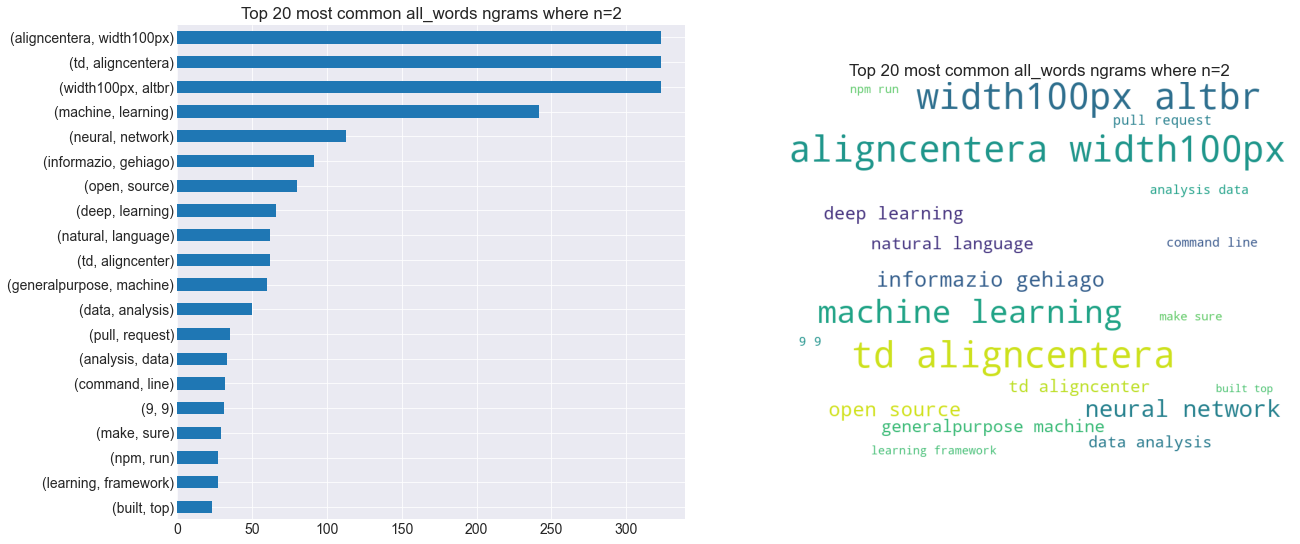

In [219]:
for key in join_text.keys():
    print (' ')
    ngrams_wordcloud(key)
    print (' ')

### - What does the distribution of IDFs look like for the most common words?**

In [222]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# # our 3 example documents
# documents = {
#     'news': 'Codeup announced last thursday that they just launched a new data science program. It is 18 weeks long.',
#     'description': 'Codeup\'s data science program teaches hands on skills using Python and pandas.',
#     'context': 'Codeup\'s data science program was created in response to a percieved lack of data science talent, and growing demand.'
# }
# print(documents)

# print('\nCleaning and lemmatizing...\n')

# documents = {topic: prep.lemmatize(prep.basic_clean(documents[topic])) for topic in documents}



In [ ]:
# documents

In [ ]:
# # A simple way to calculate idf for demonstration. Note that this
# # function relies on the globally defined documents variable.
# def idf(word):
#     n_occurences = sum([1 for doc in documents.values() if word in doc])
#     return len(documents) / n_occurences

# # Get a list of the unique words
# unique_words = pd.Series(' '.join(documents.values()).split()).unique()

# # put the unique words into a data frame
# (pd.DataFrame(dict(word=unique_words))
#  # calculate the idf for each word
#  .assign(idf=lambda df: df.word.apply(idf))
#  # sort the data for presentation purposes
#  .set_index('word')
#  .sort_values(by='idf', ascending=False)
#  .head(5))

In [ ]:
# # Get a list of the unique words
# pd.Series(' '.join(documents.values()).split()).unique()

In [ ]:
#len(documents)

In [ ]:
len(join_text)

In [ ]:
#join_text.pop("all_words")

In [224]:
def idf(word):
    'calculate idf for a word'
    n_occurences = sum([1 for doc in join_text.values() if word in doc])
    return len(join_text) / n_occurences

In [225]:
# Get a list of the unique words
unique_words = pd.Series(' '.join(join_text.values()).split()).unique()

In [226]:
len(unique_words)

12436

In [227]:
#let's check a single word
idf('build')

1.0

In [232]:
# put the unique words into a data frame
idf_df =(pd.DataFrame(dict(word=unique_words))
# calculate the idf for each word
.assign(idf=lambda train: train.word.apply(idf))
 # sort the data for presentation purposes
 .set_index('word')
 .sort_values(by='idf', ascending=False))

In [233]:
idf_df

idf
word                            
thisaddimage400              3.0
chronological                3.0
agentless                    3.0
auditabilityreviewrewriting  3.0
bootstrapping                3.0
...                          ...
dio                          1.0
tree                         1.0
ene                          1.0
unit                         1.0
lint                         1.0

[12436 rows x 1 columns]

In [236]:
#these are the most common words idf =1
idf_df[idf_df.idf==1].head()

idf
word       
option  1.0
first   1.0
sid     1.0
object  1.0
avi     1.0

In [238]:
len(idf_df[idf_df.idf==1])

871

In [240]:
len(idf_df)

12436

In [242]:
#we can see
len(idf_df[idf_df.idf==1]) /len(idf_df)

0.07003859761981344

In [ ]:
# 7 % of the total words are the most common

In [243]:
idf_df.groupby(idf).count()

idf
1.0   871
1.2   519
1.5   739
2.0  1369
3.0  8938

### Does the length of the README vary by programming language?**

In [245]:
#create a column with readme lenght
train['readme_length'] = train.lemmatized.apply(len)

In [246]:
train.head()

repo    language  \
38                 microsoft/vscode  TypeScript   
32                      nodejs/node  JavaScript   
150  goldbergyoni/nodebestpractices  JavaScript   
26                  macrozheng/mall        Java   
56              home-assistant/core      Python   

                                       readme_contents  \
38   # Visual Studio Code - Open Source ("Code - OS...   
32   <!--lint disable no-literal-urls-->\n<p align=...   
150  [✔]: assets/images/checkbox-small-blue.png\n\n...   
26   # mall\n\n<p>\n  <a href="#公众号"><img src="http...   
56   Home Assistant |Chat Status|\n================...   

                                                 clean  \
38   visual studio open source repository oss micro...   
32   lint disable opensource crossplatform runtime ...   
150  nodejsren praktika srcassetsimagesbanner2jpg a...   
26   hrefimg hrefimg 1 2 3 spring cloud hoxton 4 5 ...   
56   home assistant chat source home automation put...   

                                               stemmed  \
38   visual studio open sourc repositori oss micros...   
32   lint disabl opensourc crossplatform runtim env...   
150  nodejsren praktika srcassetsimagesbanner2jpg a...   
26   hrefimg hrefimg 1 2 3 spring cloud hoxton 4 5 ...   
56   home assist chat sourc home autom put local co...   

                                            lemmatized  readme_length  
38   visual studio open source repository os micros...           2116  
32   lint disable opensource crossplatform runtime ...           5989  
150  nodejsren praktika srcassetsimagesbanner2jpg a...          82717  
26   hrefimg hrefimg 1 2 3 spring cloud hoxton 4 5 ...            756  
56   home assistant chat source home automation put...            513

In [247]:
train.groupby('language').readme_length.mean()


language
C++           2943.750000
Java          2089.736842
JavaScript    5987.029412
Python        6213.038462
TypeScript    3300.555556
Name: readme_length, dtype: float64

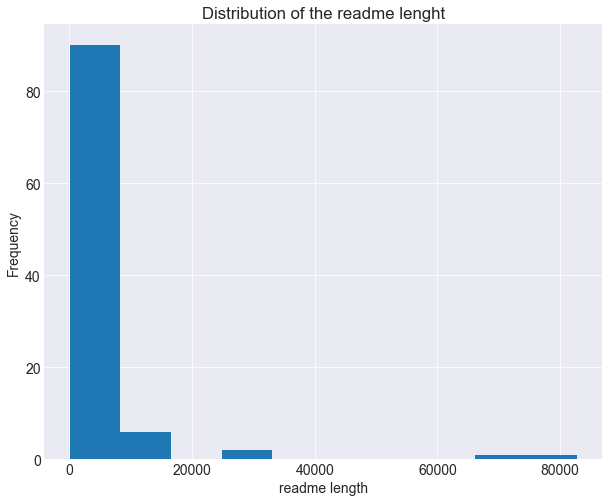

In [251]:
plt.figure(figsize=(10,8))
train.readme_length.plot.hist()
plt.xlabel('readme length')
plt.title ('Distribution of the readme length')
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
train.readme_length.plot.hist()
plt.xlabel('readme length')
plt.title ('Distribution of the readme length')
plt.show()

### word counts

In [253]:
#create a new column
train['word_count'] = train.lemmatized.apply(prep.basic_clean).apply(str.split).apply(len)

In [254]:
train.head()

repo    language  \
38                 microsoft/vscode  TypeScript   
32                      nodejs/node  JavaScript   
150  goldbergyoni/nodebestpractices  JavaScript   
26                  macrozheng/mall        Java   
56              home-assistant/core      Python   

                                       readme_contents  \
38   # Visual Studio Code - Open Source ("Code - OS...   
32   <!--lint disable no-literal-urls-->\n<p align=...   
150  [✔]: assets/images/checkbox-small-blue.png\n\n...   
26   # mall\n\n<p>\n  <a href="#公众号"><img src="http...   
56   Home Assistant |Chat Status|\n================...   

                                                 clean  \
38   visual studio open source repository oss micro...   
32   lint disable opensource crossplatform runtime ...   
150  nodejsren praktika srcassetsimagesbanner2jpg a...   
26   hrefimg hrefimg 1 2 3 spring cloud hoxton 4 5 ...   
56   home assistant chat source home automation put...   

                                               stemmed  \
38   visual studio open sourc repositori oss micros...   
32   lint disabl opensourc crossplatform runtim env...   
150  nodejsren praktika srcassetsimagesbanner2jpg a...   
26   hrefimg hrefimg 1 2 3 spring cloud hoxton 4 5 ...   
56   home assist chat sourc home autom put local co...   

                                            lemmatized  readme_length  \
38   visual studio open source repository os micros...           2116   
32   lint disable opensource crossplatform runtime ...           5989   
150  nodejsren praktika srcassetsimagesbanner2jpg a...          82717   
26   hrefimg hrefimg 1 2 3 spring cloud hoxton 4 5 ...            756   
56   home assistant chat source home automation put...            513   

     word_count  
38          263  
32          669  
150        9948  
26          101  
56           65

<Figure size 1440x360 with 0 Axes>

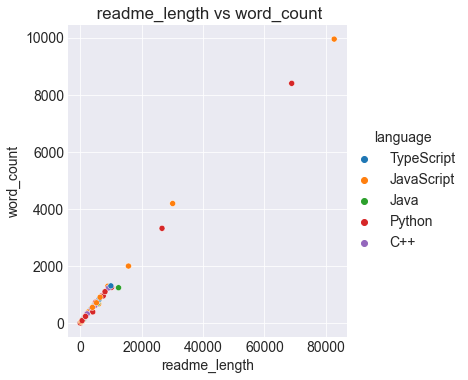

In [261]:
plt.rc('figure', figsize=(20, 10))
plt.rc('font', size=14)
plt.style.use('seaborn-darkgrid')
plt.figure(figsize= (20,5))
sns.relplot(data=train, y='word_count', x='readme_length', hue='language')
plt.title( " readme_length vs word_count")
plt.show()

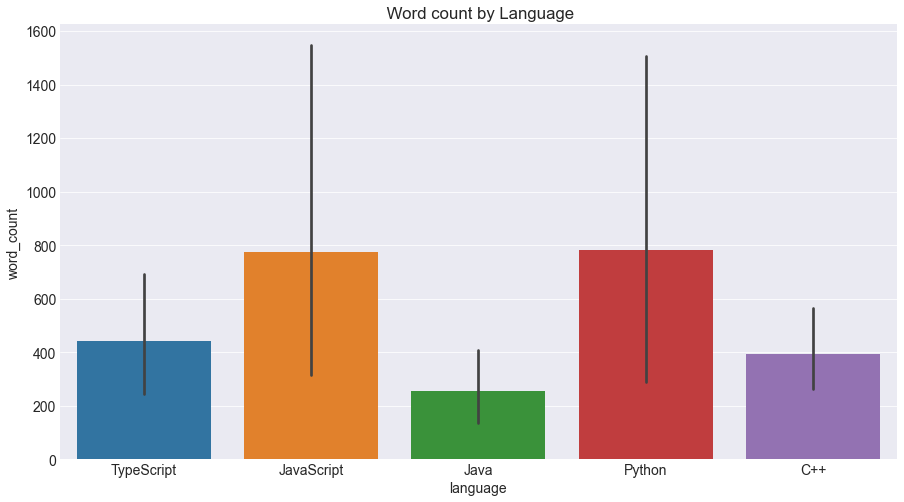

In [264]:
plt.figure(figsize= (15,8))
sns.barplot(data=train, y='word_count', x='language')
plt.title (' Word count by Language')
plt.show()

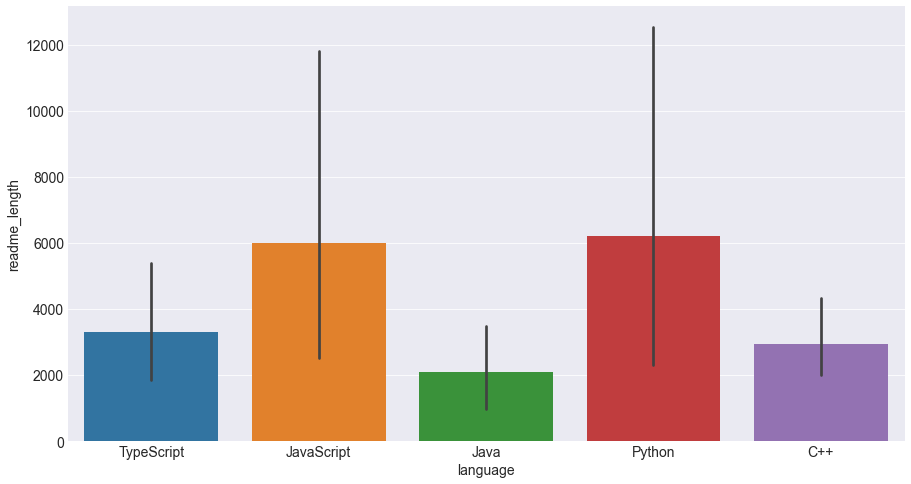

In [266]:
plt.figure(figsize= (15,8))
sns.barplot(data=train, y='readme_length', x='language')
plt.title("Readme length by language")
plt.show()

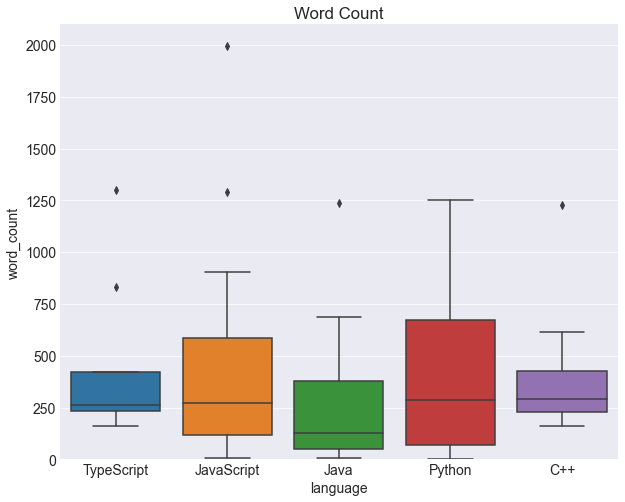

In [271]:
plt.figure(figsize= (10,8))
sns.boxplot(x='language',y ='word_count', data= train)
plt.ylim(0, 2100)
plt.title( 'Word Count')
plt.show()

(0.0, 16000.0)

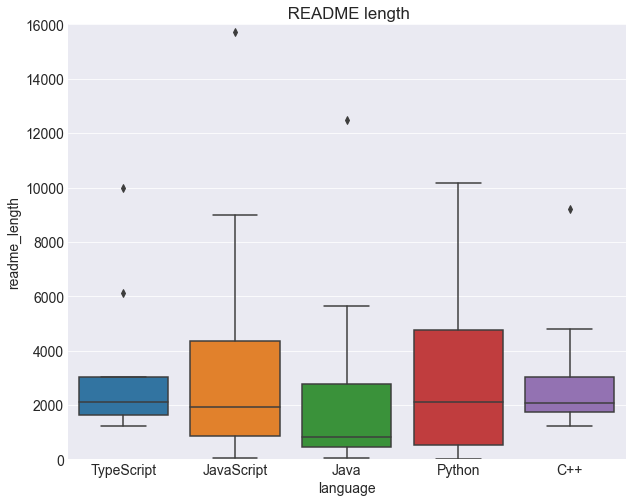

In [275]:
plt.figure(figsize= (10,8))
sns.boxplot(x='language',y ='readme_length', data= train)
plt.title(' README length')
plt.ylim(0, 16000)

In [276]:
train.groupby('language').word_count.mean()

language
C++           393.250000
Java          256.157895
JavaScript    773.941176
Python        782.115385
TypeScript    442.111111
Name: word_count, dtype: float64

In [277]:
train.groupby('language').word_count.median()

language
C++           290.0
Java          126.0
JavaScript    269.5
Python        288.5
TypeScript    263.0
Name: word_count, dtype: float64

### Do different programming languages use a different number of unique words?

In [281]:
word_counts[word_counts.all_words ==1].sum()

JavaScript    3716
Python           0
Java             0
C++              0
TypeScript       0
all_words     3716
dtype: int64

In [282]:
# Get a list of the unique words per language
unique_words

array(['lint', 'disable', 'opensource', ..., 'fraudulent', 'fraud',
       'deem'], dtype=object)

In [283]:
uniq_words={}
# Get a list of the unique words by language
for key in join_text:
    uniq_words [key] =  list(pd.Series(join_text[key].split()).unique())
    


In [285]:
uniq_words.keys()

dict_keys(['JavaScript', 'Python', 'Java', 'C++', 'TypeScript', 'all_words'])

In [286]:
len(uniq_words['JavaScript'])

7426

In [287]:
# #vizualizacion most frequet words
# def word_cloud (text):

#     plt.figure(figsize=(10,10))
#     img = WordCloud(background_color='white', width=800, height=600).generate(text)
#     plt.imshow(img)
#     plt.axis('off')
#     plt.show()

******************************UNIQUE WORDS FOR JavaScript ***************************** 


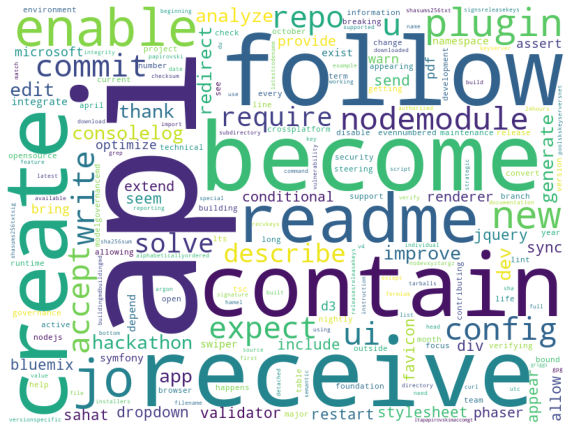

******************************UNIQUE WORDS FOR Python ***************************** 


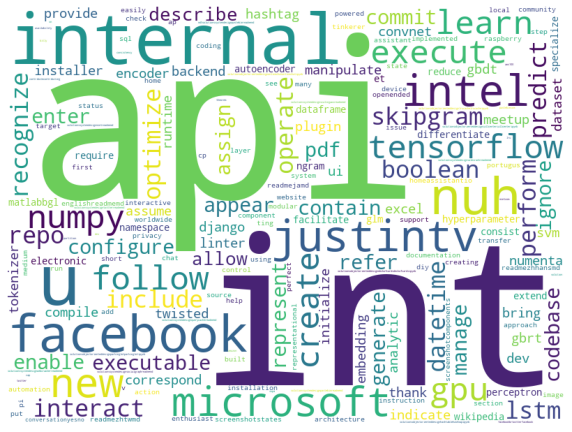

******************************UNIQUE WORDS FOR Java ***************************** 


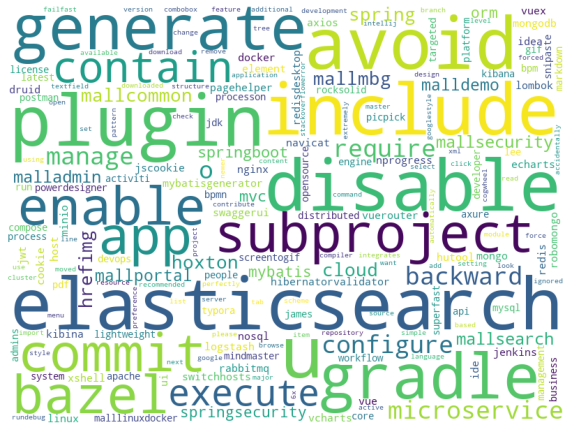

******************************UNIQUE WORDS FOR C++ ***************************** 


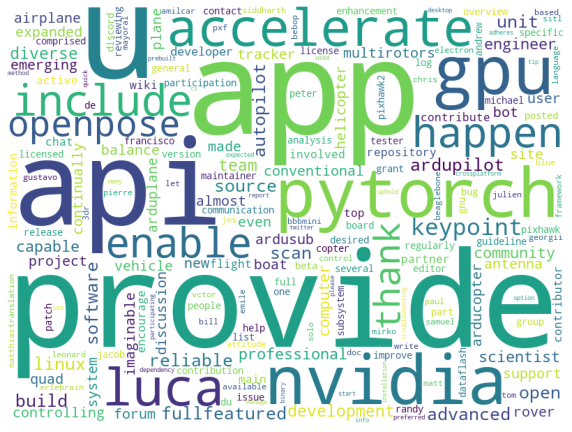

******************************UNIQUE WORDS FOR TypeScript ***************************** 


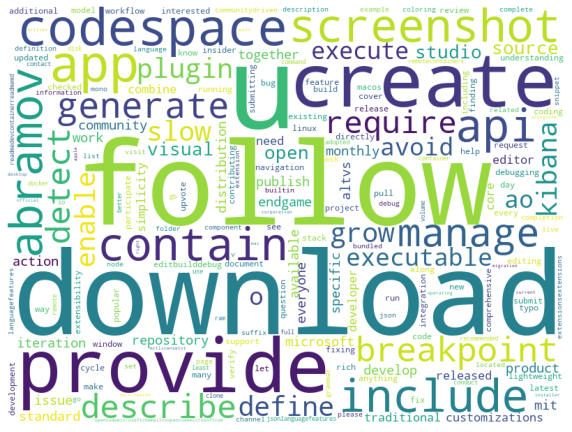

******************************UNIQUE WORDS FOR all_words ***************************** 


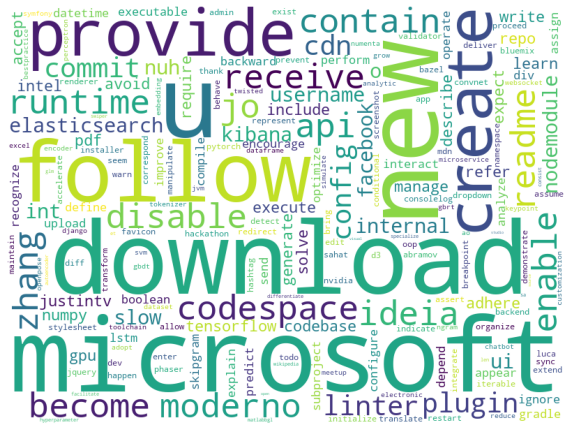

In [289]:
for key in uniq_words:    
    print(f'******************************UNIQUE WORDS FOR {key} ***************************** ')
    word_cloud (' '.join(uniq_words[key]))

In [290]:
#create a dictionary of how many unique words each language have in their readme files
len_uniq_df={}
for key in uniq_words:
    len_uniq_df[key] = len(uniq_words[key])
    

In [294]:
uni_by_lang = pd.DataFrame(len_uniq_df, index= ['unique_words'])

In [295]:
uni_by_lang

JavaScript  Python  Java   C++  TypeScript  all_words
unique_words        7426    4731  1741  1840        1509      12436

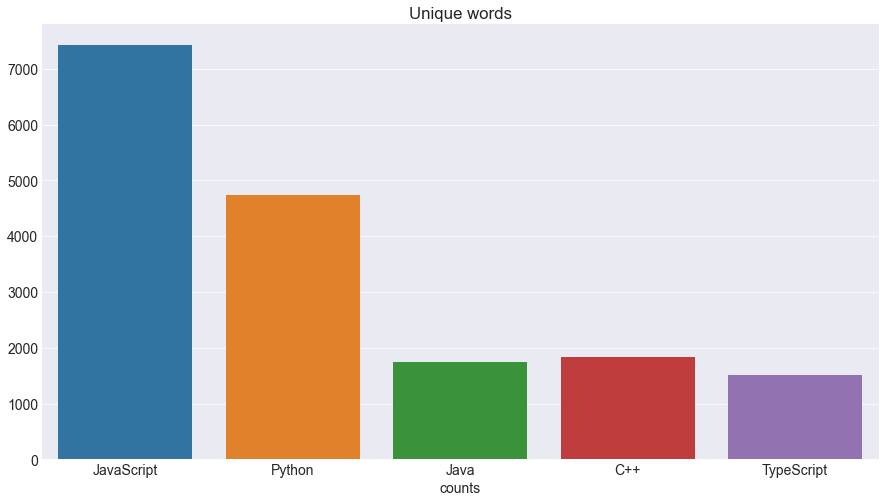

In [299]:
plt.figure(figsize= (15,8))
sns.barplot(data=uni_by_lang.drop(columns=['all_words']))
plt.xlabel('counts')
plt.title("Unique words")
plt.show()

In [ ]:
## finish ********

In [ ]:
string = 'statushttpsgithubcomh5bphtml5boilerplateworkflowsbuild20statusbadgesvghttpsgithubcomh5bphtml5boilerplateactionsqueryworkflow3a22buildstatus22branch3amaster licensehttpsimgshieldsiobadgelicensemitlightgreysvghttpsgithubcomh5bphtml5boilerplateblobmasterlicensetxt devdependency statushttpsdaviddmorgh5bphtml5boilerplatedevstatussvghttpsdaviddmorgh5bphtml5boilerplateinfodevdependencies npm downloadshttpsimgshieldsionpmdthtml5boilerplatesvghttpswwwnpmjscompackagehtml5boilerplate githubstarsimagehttpsimgshieldsiogithubstarsh5bphtml5boilerplatesvglabelgithub20starshttpsgithubcomh5bphtml5boilerplate html5 boilerplate professional frontend template building fast robust adaptable web apps site project product 10 year iterative development community knowledge impose specific development philosophy framework youre free architect code way want homepage httpshtml5boilerplatecomhttpshtml5boilerplatecom source httpsgithubcomh5bphtml5boilerplatehttpsgithubcomh5bphtml5boilerplate twitter h5bphttpstwittercomh5bp quick start choose one following option download latest stable  github github release html5boilerplatecomhttpshtml5boilerplatecom'

In [ ]:
prep.remove_stopwords(string, ['http'])

In [ ]:

import re
regexp = r'\w*github\w*'

re.sub(regexp, '', string)


# Modeling  X ---->do not  include

In [ ]:
#acquire
df1 = pd.read_csv('giturls.csv', index_col=0)


#prepare data
df1 =prep.prepare_mf(df1)

df1.drop(columns= 'index', inplace = True)

#select lemmatize
df = df1.drop(columns = ['readme_contents', 'clean', 'stemmed'])

#split train, validate and test
train, validate, test = prep.split_data(df, 'language')

In [ ]:
X_train, y_train, X_validate, y_validate, X_test, y_test = prep.split_Xy (train, validate, test, 'language' )

In [ ]:
X_train.head()

In [ ]:
# create df to store scores
score_df = pd.DataFrame(columns = ['model', 'train_score', 'validate_score'])

In [ ]:
#bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

In [ ]:
bag_of_words = cv.fit_transform(X_train.lemmatized)
bag_of_words

In [ ]:
##  TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidfs = tfidf.fit_transform(X_train.lemmatized)

pd.DataFrame(tfidfs.todense(), columns=tfidf.get_feature_names())

In [ ]:
# Bag of Ngrams
cv = CountVectorizer(ngram_range=(2, 2))
bag_of_words2 = cv.fit_transform(X_train.lemmatized)

In [ ]:
pd.DataFrame(bag_of_words2.todense(), columns=cv.get_feature_names())

# Modeling

In [300]:
# imports for modeling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, recall_score, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text


In [ ]:
def compare_train_val (model, name_dataset1, X, y, name_dataset2,  X2, y2 , name):
    '''
    Take in a  model and compare the  performance metrics of  Train, Evaluate  (only 2).
    model: the model that you want to compare
    name_dataset1 : type :train, validate or  test. Select one, STRING
    X: df test, validate or test
    y: df test, validate or test
    name_dataset2: type :train, validate or  test. Select one, STRING
    X2: df2 test, validate or test
    y2: df2 test, validate or test
    name:model name
    
    Example:
    compare_metrics(logit2,'Train',X_train, y_train,'Test', X_test, y_test, 'dec_tree')
    '''
    from IPython.display import display, display_html
    if name_dataset1.lower() != "train" and name_dataset1.lower() != "validate" and name_dataset1.lower() != "test" :
        return print("incorrect name")
    if name_dataset2.lower() != "train" and name_dataset2.lower() != "validate" and name_dataset2.lower() != "test" :
        return print("incorrect name")
    #prediction
    pred_1 = model.predict(X)
    pred_2 = model.predict(X2)

    #score = accuracy
    acc_1 = model.score(X, y)
    acc_2 = model.score(X2, y2)


    #conf Matrix
    #model 1

    conf_1 = confusion_matrix(y, pred_1)
    cf_1 =  pd.DataFrame ((confusion_matrix(y, pred_1 )),index = ['a_JavaScript','a_Python', 'a_Java', 'a_C++', 'a_TypeScript' ],\
    columns =['p_JavaScript','p_Python', 'p_Java', 'p_C++', 'p_TypeScript' ])
    
    #model2
    conf_2 = confusion_matrix(y2, pred_2)
    cf_2 =  pd.DataFrame ((confusion_matrix(y2, pred_2 )),index = ['a_JavaScript','a_Python', 'a_Java', 'a_C++', 'a_TypeScript' ],\
    columns =['p_JavaScript','p_Python', 'p_Java', 'p_C++', 'p_TypeScript' ])
    #

    #classification report
    #model1
    clas_rep_1 =pd.DataFrame(classification_report(y, pred_1, output_dict=True)).T
    clas_rep_1.rename(index={'0': "dead", '1': "survived"}, inplace = True)

    #model2
    clas_rep_2 =pd.DataFrame(classification_report(y2, pred_2, output_dict=True)).T
    clas_rep_2.rename(index={'0': "dead", '1': "survived"}, inplace = True)
    print(f'''
    ******    {name_dataset1}       ******                              ******     {name_dataset2}    ****** 
       Overall Accuracy:  {acc_1:.2%}              |                Overall Accuracy:  {acc_2:.2%}  
                                                

    ____________________________________________________________________________________________________________
    ''')
  
    cf_1_styler = cf_1.style.set_table_attributes("style='display:inline'").set_caption(f'{name_dataset1} Confusion Matrix')
    cf_2_styler = cf_2.style.set_table_attributes("style='display:inline'").set_caption(f'{name_dataset2} Confusion Matrix')
    space = "\xa0" * 25
    display_html(cf_1_styler._repr_html_()+ space  + cf_2_styler._repr_html_(), raw=True)
    print('''
     
    
    Classification Report:
    ''')
    clas_rep_1_styler = clas_rep_1.style.set_table_attributes("style='display:inline'").set_caption(f'{name_dataset1} Classification Report')
    clas_rep_2_styler = clas_rep_2.style.set_table_attributes("style='display:inline'").set_caption(f'{name_dataset2} Classification Report')
    space = "\xa0" * 45
    display_html(clas_rep_1_styler._repr_html_()+ space  + clas_rep_2_styler._repr_html_(), raw=True)
    
    
    metric_dic = {'model_name': name, 
          (name_dataset1 +'_score'): acc_1,
           (name_dataset2 +'_score'): acc_2}
    return metric_dic

In [ ]:
def model_score ( X_train, y_train, X_validate, y_validate, model, name):
    #fit the model

    model.fit(X_train, y_train)
    #get score train & validate
    train_score = model.score(X_train, y_train)
    val_score = model.score(X_validate, y_validate)
    #store metrics
    metric_dic = {'model_name': name, 
              'train_score': train_score,
               'validate_score': val_score}

    
    return metric_dic, model

In [ ]:
def nlp_xy_split(X_data, y_data):
    '''
    This function  split data during  NLP.
    X_data : cv = CountVectorizer()
            X = cv.fit_transform(df.lemmatized)
    y_data : target (df.target)
    
    Returns : X_train, y_train, X_validate, y_validate, X_test, y_test
    
    Example :
    X_train, y_train, X_validate, y_validate, X_test, y_test = nlp_xy_split (X,y)
    '''
    from sklearn.model_selection import train_test_split
    X_train_validate, X_test, y_train_validate, y_test = train_test_split(X_data, y_data, 
                                                                          stratify = y_data, 
                                                                          test_size=.2, random_state=123)
    
    X_train, X_validate, y_train, y_validate = train_test_split(X_train_validate, y_train_validate, 
                                                                stratify = y_train_validate, 
                                                                test_size=.3, 
                                                                random_state=123)
    
    return X_train, y_train, X_validate, y_validate, X_test, y_test

In [ ]:

cv = CountVectorizer()
X = cv.fit_transform(df.lemmatized)
y = df.language

In [ ]:

X_train, y_train, X_validate, y_validate, X_test, y_test = nlp_xy_split (X,y)

In [ ]:
#create a df to store metrics
metric_df =pd.DataFrame(columns= ['model_name', 'train_score', 'validate_score'])

In [ ]:
metric_df

## Decision Tree

In [ ]:
d_tree = DecisionTreeClassifier(max_depth=4)
model = d_tree.fit(X_train, y_train)


In [ ]:
res = compare_train_val(model,'train',X_train, y_train,'validate', X_validate, y_validate, 'dec_tree')

In [ ]:
#add metrics
metric_df = metric_df.append(res, ignore_index = True)
metric_df

## Naive_Bayes

In [ ]:
#fit
nb= MultinomialNB(alpha= 0.5, fit_prior= False )
model2 =nb.fit(X_train, y_train)

model2.score(X_validate, y_validate)

In [ ]:
res = compare_train_val(model2,'train',X_train, y_train,'validate', X_validate, y_validate, 'naive_bayes')

In [ ]:
#add metrics
metric_df = metric_df.append(res, ignore_index = True)
metric_df

In [ ]:
## Random Forest

In [ ]:

# create the Random Forest Model using all columns
model_rf1 = RandomForestClassifier(min_samples_leaf=5, random_state=1349)
# fit the thing
model3 = model_rf1.fit(X_train, y_train)

In [ ]:
res = compare_train_val(model3,'train',X_train, y_train,'validate', X_validate, y_validate, 'rand_forest')

In [ ]:
#add metrics
metric_df = metric_df.append(res, ignore_index = True)
metric_df

# KNN

In [ ]:
#getting the best k value with all columns
for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc_t = knn.score(X_train, y_train)
    acc_v = knn.score(X_validate, y_validate )
    if (acc_t - acc_v) < .05 :
        print(f'Model: {k} when k is {k}')
        print(f'training score: {knn.score(X_train, y_train):.2%}')
        print(f'validate score: {knn.score(X_validate, y_validate):.2%}')
        print('__________________________________________________________')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=49)
model4 = knn.fit(X_train, y_train)

In [ ]:
res = compare_train_val(model4,'train',X_train, y_train,'validate', X_validate, y_validate, 'knn')

In [ ]:
#add metrics
metric_df = metric_df.append(res, ignore_index = True)
metric_df

# logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model_lr1 =LogisticRegression(C=1.0 , random_state=123)
model5=model_lr1.fit(X_train, y_train)

In [ ]:
res = compare_train_val(model5,'train',X_train, y_train,'validate', X_validate, y_validate, 'log_reg')

In [ ]:
#add metrics
metric_df = metric_df.append(res, ignore_index = True)
metric_df

In [ ]:
# Models with Ngram

In [ ]:

cv = CountVectorizer(ngram_range=(2, 2))

X_ngram= cv.fit_transform(df.lemmatized)
y_ngram = df.language

In [ ]:
X_train, y_train, X_validate, y_validate, X_test, y_test = nlp_xy_split (X_ngram,y_ngram)

## - Decision Tree

In [ ]:
def whole_model (mod, X_train, y_train, X_validate, y_validate, model_name, metric_df):
    '''
    this function fit model , calculate metrics for train, validate  and return a df with score
    Example:
    metric_df = whole_model ((LogisticRegression(C=1.0 , random_state=123)), X_train, y_train, X_validate, y_validate, 'log_reg_ngrams', metric_df)
    '''
    #fit
    modelr =mod.fit(X_train, y_train)
    #calculate metrics
    res = compare_train_val(modelr,'train',X_train, y_train,'validate', X_validate, y_validate, model_name)
    metric_df = metric_df.append(res, ignore_index = True)
    return metric_df


In [ ]:
metric_df = whole_model ((LogisticRegression(C=1.0 , random_state=123)), X_train, y_train, X_validate, y_validate, 'log_reg_ngrams', metric_df)

In [ ]:
metric_df


In [ ]:
mod_list = [DecisionTreeClassifier(max_depth=4),
      MultinomialNB(alpha= 0.5, fit_prior= False ),
      KNeighborsClassifier(n_neighbors=49),
      RandomForestClassifier(min_samples_leaf=5, random_state=1349),
      LogisticRegression(C=1.0 , random_state=123)]

In [ ]:
mod_name_list = ['dec_tree', 'nb', 'knn', 'ran_forest', 'log_reg']

In [ ]:
for mod, mod_names in zip(mod_list, mod_name_list):
    print (f'******************************** MODEL: {mod}*******************************')
    metric_df = whole_model (mod, X_train, y_train, X_validate, y_validate, mod_names, metric_df)
    print(' ')
    print(' _______________________________________________________________________________________________________')
    print(' ')

In [ ]:
metric_df